In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import os, sys

def get_dir_n_levels_up(path, n):
    # Go up n levels from the given path
    for _ in range(n):
        path = os.path.dirname(path)
    return path

proj_root = get_dir_n_levels_up(os.path.abspath("__file__"), 4)
sys.path.append(proj_root)

import pandas as pd
import yaml
import torch
import collections

import warnings
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

warnings.filterwarnings("ignore")

from dqn.opinion_dynamics.utils.experiment import process_experiment


In [22]:
# experiment_sub_dir = "2025May02-101004_configs" # excellent run
experiment_sub_dir = "2025Jul03-020044_configs"

exp_path = os.path.join(os.path.abspath("."), "results", experiment_sub_dir)
df = process_experiment(
    exp_path
)
df.columns


Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_agent_params.args_.target_model_update_freq',
       'sub_exp_cfg_agent_params.args_.training_freq', 'sub_experiment_path',
       'seed', 'experiment_name'],


In [23]:
df

,epoch_type,frame_stamp,greedy_epsilon,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,...,episode_max_qs_median,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_agent_params.args_.target_model_update_freq,sub_exp_cfg_agent_params.args_.training_freq,sub_experiment_path,seed,experiment_name
0,training,200000,0.983159,-7.376262,-1.427960,-4.436073,-4.423594,0.835455,-6.899529,-1.400937,...,0.714885,0.250226,19499.0,30.0,0 days 00:03:58.777723,5000,10,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
1,training,400000,0.965886,-7.730604,-1.737595,-4.473984,-4.444247,0.836482,-7.220015,-1.696587,...,0.446219,0.360741,20000.0,40.0,0 days 00:04:20.299515,5000,10,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
2,training,600000,0.948614,-7.681805,-1.544932,-4.516469,-4.502351,0.829816,-7.173061,-1.515666,...,0.030183,0.519268,20000.0,40.0,0 days 00:04:29.610101,5000,10,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
3,training,800000,0.931341,-7.545669,-1.688213,-4.522131,-4.516816,0.843671,-7.047326,-1.648509,...,-0.274629,0.704980,20000.0,40.0,0 days 00:04:25.524240,5000,10,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
4,training,1000000,0.914068,-7.660520,-1.624703,-4.506266,-4.502947,0.843123,-7.148797,-1.592218,...,-0.441426,0.873677,20000.0,40.0,0 days 00:04:25.218278,5000,10,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,validation,11200000,NaN,-8.041873,-8.041796,-8.041828,-8.041830,0.000015,-7.518972,-7.518902,...,-1.380852,2.172761,NaN,NaN,0 days 00:00:00.717173,6500,12,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...
1436,validation,11400000,NaN,-8.032943,-8.032895,-8.032919,-8.032919,0.000012,-7.510528,-7.510483,...,-1.376637,2.172659,NaN,NaN,0 days 00:00:00.734108,6500,12,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...
1437,validation,11600000,NaN,-8.048314,-8.048235,-8.048266,-8.048266,0.000019,-7.525157,-7.525086,...,-1.372921,2.179679,NaN,NaN,0 days 00:00:00.697953,6500,12,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...
1438,validation,11800000,NaN,-8.048978,-8.048918,-8.048954,-8.048954,0.000013,-7.525925,-7.525870,...,-1.367558,2.183916,NaN,NaN,0 days 00:00:00.670234,6500,12,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...


In [24]:
# df[df['epoch_type'] == 'validation']
df[df['epoch_type'] == 'training']


,epoch_type,frame_stamp,greedy_epsilon,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,...,episode_max_qs_median,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_agent_params.args_.target_model_update_freq,sub_exp_cfg_agent_params.args_.training_freq,sub_experiment_path,seed,experiment_name
0,training,200000,0.983159,-7.376262,-1.427960,-4.436073,-4.423594,0.835455,-6.899529,-1.400937,...,0.714885,0.250226,19499.0,30.0,0 days 00:03:58.777723,5000,10,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
1,training,400000,0.965886,-7.730604,-1.737595,-4.473984,-4.444247,0.836482,-7.220015,-1.696587,...,0.446219,0.360741,20000.0,40.0,0 days 00:04:20.299515,5000,10,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
2,training,600000,0.948614,-7.681805,-1.544932,-4.516469,-4.502351,0.829816,-7.173061,-1.515666,...,0.030183,0.519268,20000.0,40.0,0 days 00:04:29.610101,5000,10,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
3,training,800000,0.931341,-7.545669,-1.688213,-4.522131,-4.516816,0.843671,-7.047326,-1.648509,...,-0.274629,0.704980,20000.0,40.0,0 days 00:04:25.524240,5000,10,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
4,training,1000000,0.914068,-7.660520,-1.624703,-4.506266,-4.502947,0.843123,-7.148797,-1.592218,...,-0.441426,0.873677,20000.0,40.0,0 days 00:04:25.218278,5000,10,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,training,11200000,0.050000,-7.241558,-1.597896,-4.300360,-4.252966,0.789731,-6.782948,-1.561150,...,-0.768603,1.313272,16667.0,36.0,0 days 00:04:06.034754,6500,12,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...
1376,training,11400000,0.050000,-7.280516,-1.360909,-4.321666,-4.292034,0.793141,-6.819898,-1.335223,...,-0.770916,1.315826,16666.0,36.0,0 days 00:04:05.653730,6500,12,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...
1377,training,11600000,0.050000,-7.440056,-1.908551,-4.328893,-4.298816,0.788373,-6.971930,-1.856022,...,-0.770776,1.314522,16667.0,24.0,0 days 00:04:05.427432,6500,12,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...
1378,training,11800000,0.050000,-7.527768,-1.945335,-4.305680,-4.271453,0.805385,-7.038141,-1.892096,...,-0.767325,1.312695,16667.0,36.0,0 days 00:04:05.135475,6500,12,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...


In [25]:
# Define hyperparameter columns
hyperparam_columns = [col for col in df.columns if "sub_exp_cfg" in col]

# Group by hyperparameter values and compute mean episode_rewards_mean
averaged_results = df.groupby(hyperparam_columns, as_index=False).agg({
    'episode_rewards_mean': 'mean',  # Averaging the performance metric
    'sub_experiment_path': 'first'   # Keep a reference to an experiment path
})

# Find the best hyperparameter set based on the highest mean reward
best_row = averaged_results.loc[averaged_results['episode_rewards_mean'].idxmax()]

# Print the best experiment path and hyperparameters
print(f"Best hyperparameters:\n{best_row[hyperparam_columns]}")
print(f"Best mean reward: {best_row['episode_rewards_mean']}")

Best hyperparameters:
sub_exp_cfg_agent_params.args_.target_model_update_freq    5000
sub_exp_cfg_agent_params.args_.training_freq                 10
Name: 0, dtype: object
Best mean reward: -6.169994073451489


In [26]:
averaged_results

,sub_exp_cfg_agent_params.args_.target_model_update_freq,sub_exp_cfg_agent_params.args_.training_freq,episode_rewards_mean,sub_experiment_path
0,5000,10,-6.169994,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
1,5000,12,-6.278429,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
2,6500,10,-6.289439,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
3,6500,12,-6.257509,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...


In [27]:
# selected_metric = 'episode_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"

# # Filter for validation episodes
# validation_df = df[df['epoch_type'] == 'validation']

# # Get the unique sorted frame_stamp values
# unique_frames = np.sort(validation_df['frame_stamp'].unique())
# N = 1
# # Get all frame_stamp values after the first N unique ones
# filtered_frames = unique_frames[N:]

# # Filter the DataFrame to only include rows with these frame_stamp values
# filtered_df = validation_df[validation_df['frame_stamp'].isin(filtered_frames)]

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=filtered_df, x='frame_stamp', y=selected_metric, hue=hue_col)
# plt.ylabel(selected_metric)
# plt.xlabel('Frame Stamp')
# plt.show()

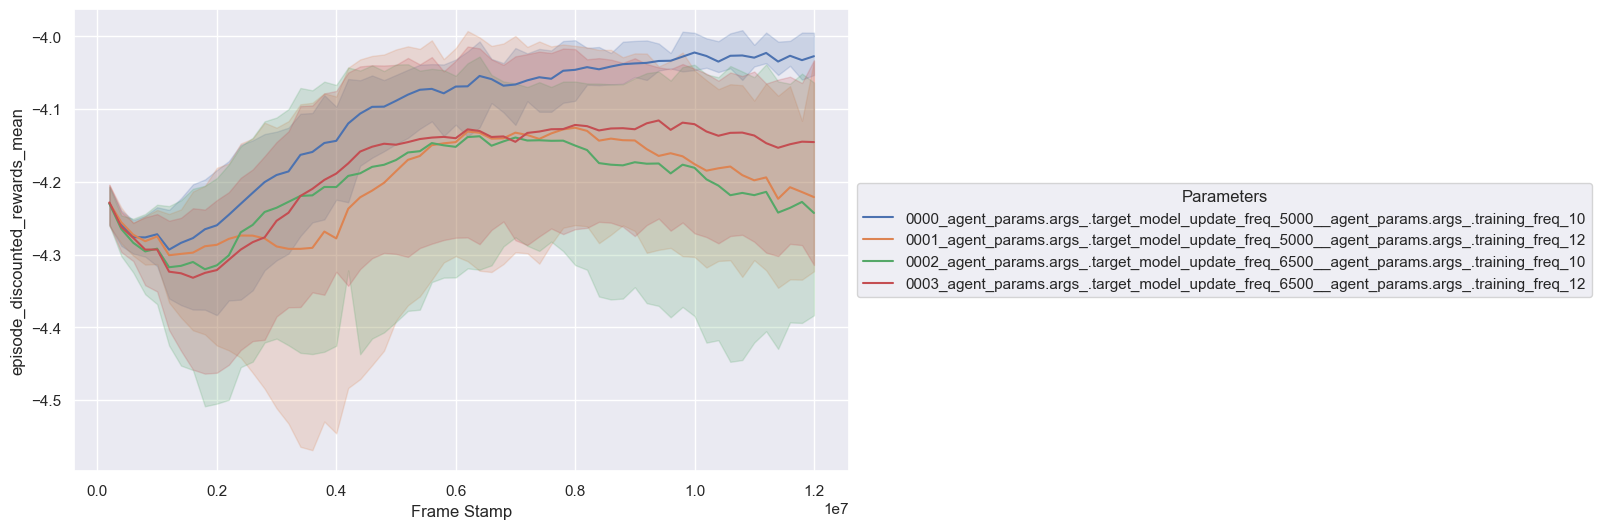

In [28]:

selected_metric = 'episode_discounted_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"
hue_col = "experiment_name"

# validation_df = df[df['epoch_type'] == 'validation']
validation_df = df[df['epoch_type'] == 'training']


# Create a new figure for each environment
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue='model')
sns.lineplot(data=validation_df, 
             x='frame_stamp', 
             y=selected_metric, 
             hue=hue_col,
            #  units='seed', # Comment this to see mean + cf
            #  estimator=None, # Comment this to see mean + cf
             )

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Parameters')
plt.show()

In [29]:
df.columns

Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_agent_params.args_.target_model_update_freq',
       'sub_exp_cfg_agent_params.args_.training_freq', 'sub_experiment_path',
       'seed', 'experiment_name'],


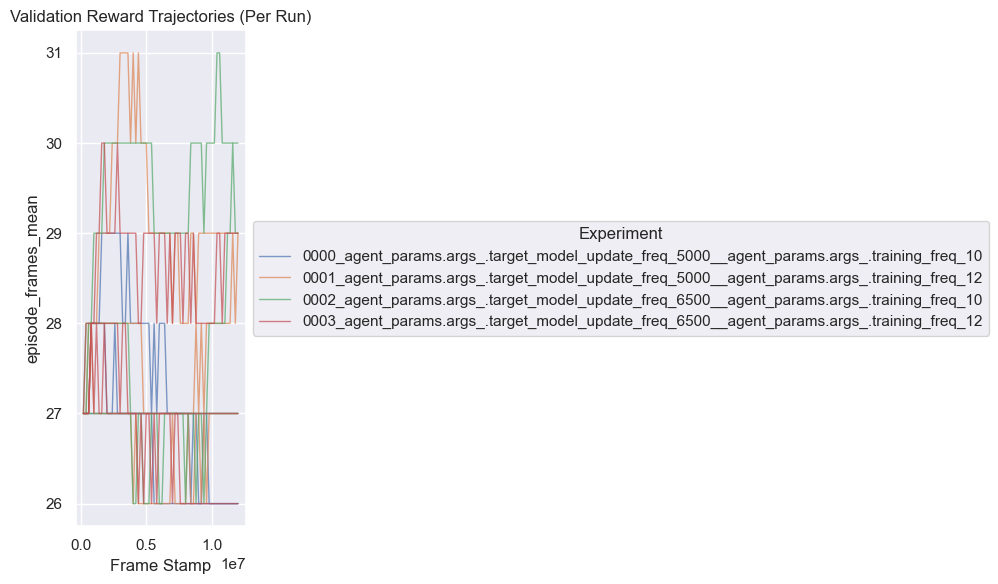

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_metric = 'episode_frames_mean'
hue_col = "experiment_name"  # or another distinguishing column like "sub_experiment_path"

validation_df = df[df['epoch_type'] == 'validation']

# Plot individual lines for each run
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=validation_df,
    x='frame_stamp',
    y=selected_metric,
    hue=hue_col,
    estimator=None,  # ← disables aggregation
    units='sub_experiment_path',  # ← groups lines by unique run
    lw=1,  # line width
    alpha=0.7  # transparency
)

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.title('Validation Reward Trajectories (Per Run)')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Experiment')
plt.tight_layout()
plt.show()


In [31]:
### Select data

experiment_columns = [
    'epoch_type', 'frame_stamp',
    'episode_rewards_mean', 'episode_frames_mean', 
    'episode_discounted_rewards_mean',
    'policy_trained_times', 'target_trained_times', 'epoch_time', 
       'seed', 'experiment_name', "sub_experiment_path"
]
hyperparam_columns = [
   col for col in df.columns if "sub_exp_cfg" in col
]

cols_of_interest = experiment_columns + hyperparam_columns

sub_df = df[cols_of_interest]
sub_df = sub_df[sub_df['epoch_type'] == 'validation']
sub_df = sub_df[sub_df['frame_stamp'] == sub_df['frame_stamp'].max()]

sub_df 


,epoch_type,frame_stamp,episode_rewards_mean,episode_frames_mean,episode_discounted_rewards_mean,policy_trained_times,target_trained_times,epoch_time,seed,experiment_name,sub_experiment_path,sub_exp_cfg_agent_params.args_.target_model_update_freq,sub_exp_cfg_agent_params.args_.training_freq
119,validation,12000000,-7.871424,26.0,-7.376258,NaN,NaN,0 days 00:00:00.526142,0,0000_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5000,10
239,validation,12000000,-8.012848,27.0,-7.493020,NaN,NaN,0 days 00:00:00.489469,1,0000_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5000,10
359,validation,12000000,-7.910150,26.0,-7.408742,NaN,NaN,0 days 00:00:00.379686,2,0000_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5000,10
479,validation,12000000,-8.224323,29.0,-7.662357,NaN,NaN,0 days 00:00:00.663886,0,0001_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5000,12
599,validation,12000000,-8.346666,29.0,-7.768675,NaN,NaN,0 days 00:00:00.650359,1,0001_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5000,12
719,validation,12000000,-7.943291,27.0,-7.431662,NaN,NaN,0 days 00:00:00.550027,2,0001_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5000,12
839,validation,12000000,-8.209332,29.0,-7.651763,NaN,NaN,0 days 00:00:00.445909,0,0002_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,6500,10
959,validation,12000000,-8.395696,30.0,-7.802051,NaN,NaN,0 days 00:00:00.409816,1,0002_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,6500,10
1079,validation,12000000,-8.009673,27.0,-7.489797,NaN,NaN,0 days 00:00:00.386624,2,0002_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,6500,10
1199,validation,12000000,-7.902051,26.0,-7.403219,NaN,NaN,0 days 00:00:00.547488,0,0003_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,6500,12


In [32]:
agg_cols = [col for col in sub_df.columns if "sub_exp_cfg" in col]
aggregated_df = (
    sub_df.groupby(agg_cols)
    .agg(episode_discounted_rewards_mean=("episode_discounted_rewards_mean", "mean"))
    .reset_index()
)
aggregated_df

,sub_exp_cfg_agent_params.args_.target_model_update_freq,sub_exp_cfg_agent_params.args_.training_freq,episode_discounted_rewards_mean
0,5000,10,-7.426007
1,5000,12,-7.620898
2,6500,10,-7.647870
3,6500,12,-7.568824


In [33]:
sub_df.columns

Index(['epoch_type', 'frame_stamp', 'episode_rewards_mean',
       'episode_frames_mean', 'episode_discounted_rewards_mean',
       'policy_trained_times', 'target_trained_times', 'epoch_time', 'seed',
       'experiment_name', 'sub_experiment_path',
       'sub_exp_cfg_agent_params.args_.target_model_update_freq',
       'sub_exp_cfg_agent_params.args_.training_freq'],
      dtype='object')

In [34]:
print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['sub_experiment_path'].values[0])



d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results\2025Jul03-020044_configs\0000_agent_params.args_.target_model_update_freq_5000__agent_params.args_.training_freq_10\0


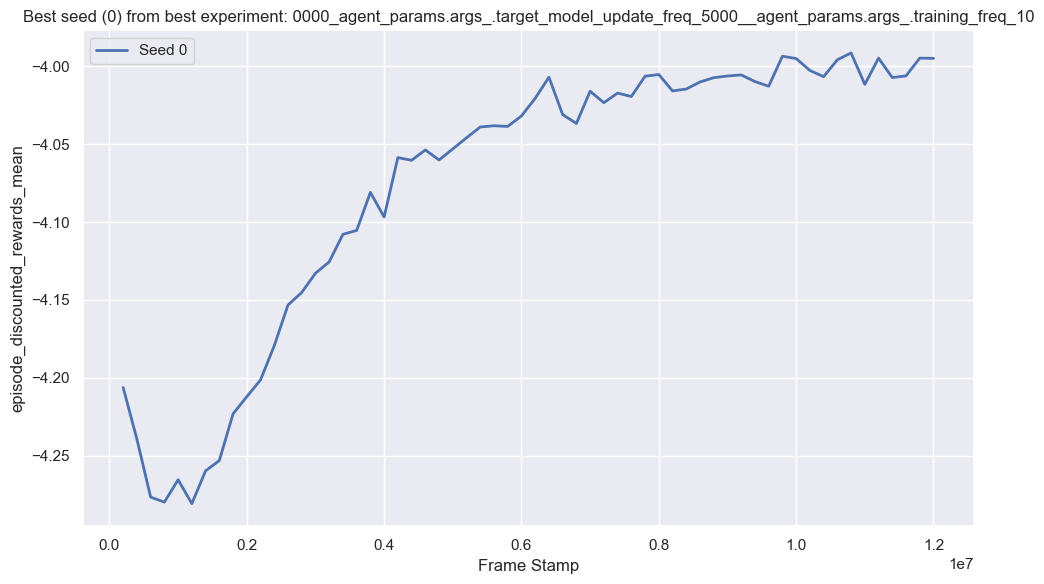

In [35]:
selected_metric = 'episode_discounted_rewards_mean'
hue_col = "experiment_name"

# Filter for training data only
training_df = df[df['epoch_type'] == 'training']
# training_df = df[df['epoch_type'] == 'validation']

# Step 1: Find best experiment
experiment_means = training_df.groupby(hue_col)[selected_metric].mean()
best_experiment = experiment_means.idxmax()

# Step 2: Filter to that experiment
best_exp_df = training_df[training_df[hue_col] == best_experiment]

# Step 3: Find best seed within best experiment
best_seed = (
    best_exp_df.groupby('seed')[selected_metric]
    .mean()
    .idxmax()
)

# Step 4: Filter to best seed
best_seed_df = best_exp_df[best_exp_df['seed'] == best_seed]

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=best_seed_df,
    x='frame_stamp',
    y=selected_metric,
    lw=2,
    label=f"Seed {best_seed}"
)

plt.title(f"Best seed ({best_seed}) from best experiment: {best_experiment}")
plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.legend()
plt.tight_layout()
plt.show()

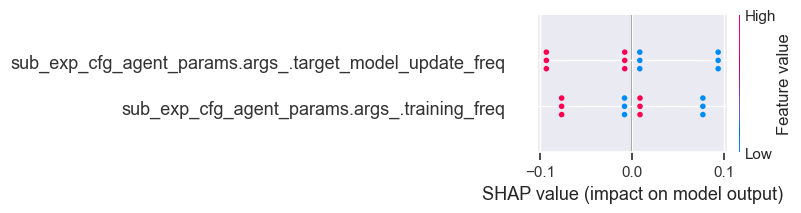

In [36]:
import shap
import xgboost
import pandas as pd


# Define the target metric and hyperparameter columns
target_metric = "episode_rewards_mean"  # Replace with actual metric column name
# Replace with actual hyperparameter column names

# Prepare data
X = sub_df[hyperparam_columns].apply(pd.to_numeric, errors='coerce')
y = sub_df[target_metric].fillna(3 * sub_df[target_metric].min())

# Train an XGBoost model to analyze feature importance
model = xgboost.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model.fit(X, y)

# SHAP analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X)

In [37]:
hyperparam_columns

['sub_exp_cfg_agent_params.args_.target_model_update_freq',
 'sub_exp_cfg_agent_params.args_.training_freq']

In [38]:
import plotly.express as px

# Define readable names for selected hyperparams
readable_names = {
    hyperparam_columns[0]: "noise",
    hyperparam_columns[1]: "size"
}

# Rename columns in a copy of the dataframe
plot_df = sub_df.rename(columns=readable_names)

# Assign new column names
x_col = "noise"
y_col = "episode_rewards_mean"
facet_col = "size"

# Plot
fig = px.scatter(
    plot_df,
    x=x_col,
    y=y_col,
    color="experiment_name",  # Optional: color by experiment
    facet_col=facet_col,
    title="Episode Rewards vs. Noise Faceted by Size",
    height=600
)

fig.update_layout(showlegend=False)
fig.show()
